In [2]:
from pathlib import Path
import torch
import torch.nn.functional as nnF
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
from vit import MyViT

#from config import get_config, latest_weights_file_path
#from train import get_model, get_ds, run_validation
#from translate import translate

print(torch.__version__)
print(str(torchaudio.list_audio_backends()))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Define the custom order
classes = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

2.4.1+cu124
['soundfile']
cuda:0


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

EPOCHS = 30

CHW = (1,200,200)
NUM_CLASSES = 10
N_PATCHES = 25
N_HEADS = 4
N_ENCODERS = 4
HIDDEN_DIM = 32


cuda:0


In [ ]:
def plot_spectrogram(spectrogram):
  spectrogram = spectrogram.cpu()  # Move to CPU if on GPU
  spectrogram = spectrogram.log2()
  
  #plt.figure(figsize=(5, 5))  # Make the figure a square
  plt.imshow(spectrogram[0, :, :].numpy(), cmap='inferno', origin='lower')
  #plt.gca().invert_yaxis()  # Invert y-axis
  plt.axis('off')  # Remove axes
  plt.gca().set_axis_off()
  plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
  plt.margins(0, 0) 
  plt.gca().xaxis.set_major_locator(plt.NullLocator())
  plt.gca().yaxis.set_major_locator(plt.NullLocator())
  plt.show()


In [ ]:
def save_spectrogram(spectrogram, file_path):
  spectrogram = spectrogram.cpu()  # Move to CPU if on GPU
  spectrogram = spectrogram.log2()
  
  plt.figure(figsize=(5, 5))  # Make the figure a square
  plt.imshow(spectrogram[0, :, :].numpy(), cmap='inferno', origin='lower')
  #plt.gca().invert_yaxis()  # Invert y-axis
  plt.gca().set_axis_off()
  plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
  plt.margins(0, 0)
  plt.gca().xaxis.set_major_locator(plt.NullLocator())
  plt.gca().yaxis.set_major_locator(plt.NullLocator())
  plt.savefig(file_path, bbox_inches='tight', pad_inches=0)
  plt.close()
  print(f"Spectrogram saved to {file_path}")

In [6]:
def resize_spectrogram(spectrogram, target_size=(224, 224)):
  # Interpolate to the target size
  resized_spectrogram = nnF.interpolate(spectrogram.unsqueeze(0), size=target_size, mode='bilinear', align_corners=False)
  return resized_spectrogram.squeeze(0)

In [7]:
def crop(waveform, target_length=16000):
  if waveform.shape[1] < target_length:
    padding = target_length - waveform.shape[1]
    waveform = nnF.pad(waveform, (0, padding))
  else:
    waveform = waveform[:, :target_length]
  return waveform

In [8]:
def process_audio(audio_path):
  spectrogram_transform = T.MelSpectrogram(
    n_fft=1024,          # Adjust size of FFT to capture more details
    hop_length=128,     # Set the hop length to control overlap
    normalized=True,
    onesided=True,
    power=1.0
  )

  waveform, _ = torchaudio.load(audio_path)
  waveform = crop(waveform)
  spectrogram = spectrogram_transform(waveform)
  spectrogram = resize_spectrogram(spectrogram, target_size=CHW[1:])
  return spectrogram

zero:	0.00
one:	1.00
two:	0.00
three:	0.00
four:	0.00
five:	0.00
six:	0.00
seven:	0.00
eight:	0.00
nine:	0.00


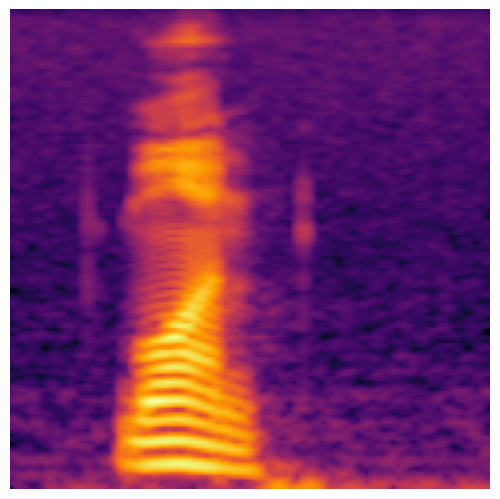

In [26]:
model = MyViT((1,200,200), n_patches=25, n_blocks=4, hidden_d=32, n_heads=4, out_d=10).to(device)
model.load_state_dict(torch.load('ASTmodel_E10_200_25_4_4_25_32.pth', weights_only=True))

model.eval()

image_path = 'audio/1.wav'
spectrogram = process_audio(image_path)

input = spectrogram.unsqueeze(0)
with torch.no_grad():
  output = model(input)

np_output = (output.cpu()).numpy()[0]

j=0
for i in np_output:
  print("%s:\t%.2f" % (classes[j], i))
  j += 1


plot_spectrogram(spectrogram)